In [33]:
# Second task: a classification excercise
#
# Common imports
#import sys
#import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
import sklearn

In [35]:
# Get the dataset from scikitlearn library
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
# For example the 'DESCR' key contains a lot of information on the dataset...
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [37]:
# Let's look at the data...
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
# the data are in a 150x4 matrix, i.e. we have 150 items in the dataset and for each 4 features
iris['data'].shape

(150, 4)

In [39]:
# What are the features? Let's look into it:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
# Now let's look at the target values or labels...
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
# What do this numbers refer to? It is 0 for setosa, 1 for versicolor and 2 for virginica...
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
# We first want to train the simpliest binary classifier for Iris virginica. This classifier has two output classes, it's a Iris virginica
# or it's not a Iris virginica. In other words, the answer to the question "Is it a five digit?" can be True (1) or False (0).
# Moreover, I use only one feature (petal width) from the dataset.

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int64)  # 1 if Iris virginica, else 0

In [43]:
# I can now train a LogisticRegression classifier (remember what we discussed during the lectures)...

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
# As we did in example 1, we could not try to predict the class of a new item, given its single feature "petal width". 
# if we try 
# y_new = log_reg.predict(1.0)
# we'll get an error. The reason is that the method "predict" wants in input a numpy matrix of shape (1,1). 
# So we need to create it with a single value 1.0 first:
X_new = np.array(1.0).reshape(-1,1)
X_new_1 = np.array(2.0).reshape(-1,1)

print(X_new, X_new_1)

[[1.]] [[2.]]


In [45]:
# Now we can predict the class for this new item:
y_new = log_reg.predict(X_new)
y_new   # the output here is 0, not Virginica, or 1, Virginica

array([0])

In [46]:
# An alternative way (and maybe simplier for a single value) to do it is:
y_new = log_reg.predict([[1.0]])
y_new

array([0])

In [47]:
#TODO: Predict the class for another value of petal width
y_new_1 = log_reg.predict([[6.0]])
y_new_1

array([1])

In [48]:
# The classifier can also give me the probabilities (of class 0, not Virginica, and 1, Virginica, in this case)
# instead of the class
y_proba = log_reg.predict_proba(X_new)
y_proba
# the results here show that this classifier is estimating a probability of 0.946 of not being a Virginica (class 0)
# for the new item, and 0.05408357 of being a Virginica

array([[0.94587946, 0.05412054]])

In [49]:
#TODO: Calculate the probabilities for another value of petal width

y_proba_1 = log_reg.predict_proba([[6.0]])
y_proba_1

array([[6.83166501e-09, 9.99999993e-01]])

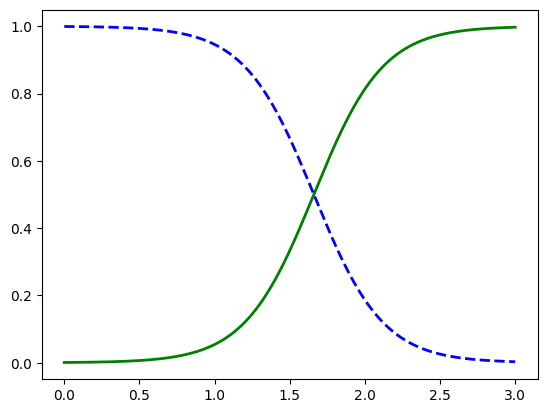

In [50]:
# Now let's try to plot this probability as a function of the single feature petal width
X_new_p = np.linspace(0, 3, 1000).reshape(-1, 1) # create a thousand points from 0 to 3 equally spaced
y_proba_p = log_reg.predict_proba(X_new_p)  # compute the probabilities for each point

# Plot the results
plt.plot(X_new_p, y_proba_p[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new_p, y_proba_p[:, 0], "b--", linewidth=2, label="Not Iris virginica")

(np.float64(0.0), np.float64(3.0), np.float64(-0.02), np.float64(1.02))

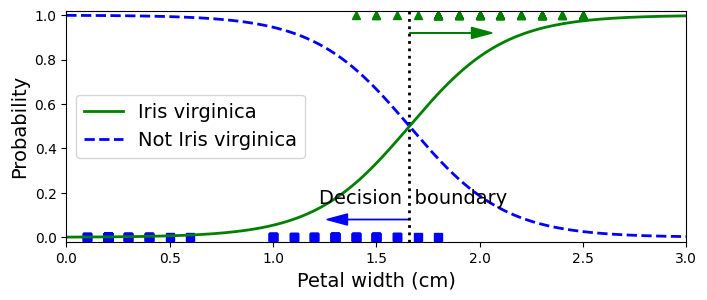

In [51]:
# Optional: if you want a fancier plot you can get it here:
X_new_p = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba_p = log_reg.predict_proba(X_new_p)
decision_boundary = X_new_p[y_proba_p[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new_p, y_proba_p[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new_p, y_proba_p[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

In [52]:
# The decision boundary here is 1.66 
decision_boundary

array([1.66066066])

In [53]:
######################################################################################################
# Optional section: how did we get the decision boundary?
#
print(y_proba_p.shape)    # There are two probabilities
print(y_proba_p[:, 1])    # Here I extract only the probability of being a Virginica

(1000, 2)
[7.50949397e-04 7.60776030e-04 7.70731151e-04 7.80816439e-04
 7.91033591e-04 8.01384329e-04 8.11870398e-04 8.22493563e-04
 8.33255615e-04 8.44158365e-04 8.55203651e-04 8.66393332e-04
 8.77729293e-04 8.89213442e-04 9.00847713e-04 9.12634066e-04
 9.24574485e-04 9.36670979e-04 9.48925584e-04 9.61340365e-04
 9.73917409e-04 9.86658834e-04 9.99566784e-04 1.01264343e-03
 1.02589098e-03 1.03931165e-03 1.05290770e-03 1.06668142e-03
 1.08063514e-03 1.09477118e-03 1.10909194e-03 1.12359982e-03
 1.13829725e-03 1.15318672e-03 1.16827072e-03 1.18355179e-03
 1.19903250e-03 1.21471545e-03 1.23060327e-03 1.24669864e-03
 1.26300425e-03 1.27952286e-03 1.29625723e-03 1.31321017e-03
 1.33038453e-03 1.34778320e-03 1.36540910e-03 1.38326518e-03
 1.40135445e-03 1.41967994e-03 1.43824473e-03 1.45705193e-03
 1.47610470e-03 1.49540623e-03 1.51495977e-03 1.53476859e-03
 1.55483602e-03 1.57516542e-03 1.59576020e-03 1.61662381e-03
 1.63775976e-03 1.65917158e-03 1.68086287e-03 1.70283725e-03
 1.72509841e-0

In [54]:
print(y_proba_p[:, 1] >= 0.5)   # Here I get an array of True/False values

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [55]:
print(X_new_p[y_proba_p[:, 1] >= 0.5])

[[1.66066066]
 [1.66366366]
 [1.66666667]
 [1.66966967]
 [1.67267267]
 [1.67567568]
 [1.67867868]
 [1.68168168]
 [1.68468468]
 [1.68768769]
 [1.69069069]
 [1.69369369]
 [1.6966967 ]
 [1.6996997 ]
 [1.7027027 ]
 [1.70570571]
 [1.70870871]
 [1.71171171]
 [1.71471471]
 [1.71771772]
 [1.72072072]
 [1.72372372]
 [1.72672673]
 [1.72972973]
 [1.73273273]
 [1.73573574]
 [1.73873874]
 [1.74174174]
 [1.74474474]
 [1.74774775]
 [1.75075075]
 [1.75375375]
 [1.75675676]
 [1.75975976]
 [1.76276276]
 [1.76576577]
 [1.76876877]
 [1.77177177]
 [1.77477477]
 [1.77777778]
 [1.78078078]
 [1.78378378]
 [1.78678679]
 [1.78978979]
 [1.79279279]
 [1.7957958 ]
 [1.7987988 ]
 [1.8018018 ]
 [1.8048048 ]
 [1.80780781]
 [1.81081081]
 [1.81381381]
 [1.81681682]
 [1.81981982]
 [1.82282282]
 [1.82582583]
 [1.82882883]
 [1.83183183]
 [1.83483483]
 [1.83783784]
 [1.84084084]
 [1.84384384]
 [1.84684685]
 [1.84984985]
 [1.85285285]
 [1.85585586]
 [1.85885886]
 [1.86186186]
 [1.86486486]
 [1.86786787]
 [1.87087087]
 [1.87

In [56]:
decision_boundary = X_new_p[y_proba_p[:, 1] >= 0.5][0]   # The first values of the above array is the decision boundary
print(decision_boundary)

[1.66066066]


In [57]:
# End of optional section
###############################################################################################################################

In [58]:
# Now let's try to compute the confusion matrix for this binary classifier. We do it on the whole dataset
# (not very correct) because the dataset is small (we should use cross validation, but it is more complicated)

y_pred = log_reg.predict(X)

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)


array([[98,  2],
       [ 4, 46]])

In [59]:
# We can compute other scores, as precision and recall

from sklearn.metrics import precision_score, recall_score

precision_score(y, y_pred)

0.9583333333333334

In [60]:
recall_score(y, y_pred)

0.92

In [61]:
#TODO: retrain a binary LogisticRegression classifier with only one feature as we just did, 
# but first of all split the dataset into a training set (80% of the data) and test set (20% of the data).
# Use the train_test_split function from scikit learn as in example 1.
# After training, recompute the confusion matrix and scores on both the training set and the test set.
# Can you comment on the differences?

# we choose the training on the petal length
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



X = iris["data"][:, 2][:, None]  # petal length, take the column n 2
y = (iris["target"] == 2).astype(np.int64)  # this tests if X is = 2. 1 = True if Iris virginica, else 0 = False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y) # we divide in test and train sets

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

j = confusion_matrix(y_train, y_train_pred)
k = confusion_matrix(y_test, y_test_pred)
print(j, "\n",k)
# The values on the anti-diagonal are low and similar between each other. This means a good accuracy  because we have a low number of false positives and false negatives, and are not really different (3, 2 and 1,1) which means that probably the model is not biased.
# After analyzing the dataset distribution, however, we see that Virginica is only 1/3 of the whole dataset; this means that the values of false negatives and false positives cannot be taken like that when the dataset is unbalanced
# As we expected, we obtained that the true positives are about 33% of the set, while the remaining are the true negatives. 
# This is because 1/3 of the dataset is Virginica (true positive) and the remaining 2/3 are not Virginica (true negatives)


[[77  3]
 [ 2 38]] 
 [[19  1]
 [ 1  9]]


In [62]:
#TODO: retrain a binary LogisticRegression classifier but with all the 4 features in the original iris dataset and splitting
# into a training set (80% of the data) and test set (20% of the data). 
# Use the train_test_split function from scikit learn as in example 1.
# After training, recompute the confusion matrix and scores on both the training set and the test set.
# How do the scores compare with the previous classifier (with only one feature)?

In [ ]:
X = iris["data"] # we consider all the features
y = (iris["target"] == 2).astype(np.int64)  # this tests if X is = 2. 1 = True if Iris virginica, else 0 = False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y) # we divide in test and train sets

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

l = confusion_matrix(y_train, y_train_pred)
m = confusion_matrix(y_test, y_test_pred)
print(l, "\n",m)

# How do the scores compare with the previous classifier (with only one feature)? We see a slight improvement of the false positives and false negatives, especially in the test set: we have zeros on the anti-diagonal.

[[78  2]
 [ 1 39]] 
 [[20  0]
 [ 0 10]]
